<a href="https://colab.research.google.com/github/Saranyanv/test/blob/master/455_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: https://catalog.data.gov/dataset/air-quality-measures-on-the-national-environmental-health-tracking-network

In [0]:
import os 
import numpy as np
import zipfile
from tqdm import tqdm
from pandas import DataFrame
import pandas as pd
import io
RANDOM_SEED = 42

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Air_Quality_Measures_on_the_National_Environmental_Health_Tracking_Network.csv to Air_Quality_Measures_on_the_National_Environmental_Health_Tracking_Network.csv


In [0]:
TX_Air_Quality = pd.read_csv(io.StringIO(uploaded['Air_Quality_Measures_on_the_National_Environmental_Health_Tracking_Network.csv'].decode('utf-8')), sep = ',')

In [0]:
TX_Air_Quality.head()

In [5]:
TX_Air_Quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15651 entries, 0 to 15650
Data columns (total 14 columns):
MeasureId              15651 non-null int64
MeasureName            15651 non-null object
MeasureType            15651 non-null object
StratificationLevel    15651 non-null object
StateFips              15651 non-null int64
StateName              15651 non-null object
CountyFips             15651 non-null int64
CountyName             15651 non-null object
ReportYear             15651 non-null int64
Value                  15651 non-null float64
Unit                   15651 non-null object
UnitName               15651 non-null object
DataOrigin             15651 non-null object
MonitorOnly            15651 non-null int64
dtypes: float64(1), int64(5), object(8)
memory usage: 1.7+ MB


In [6]:
print('Shape of the TX_Air_Quality: Rows, Columns')
TX_Air_Quality.shape

Shape of the TX_Air_Quality: Rows, Columns


(15651, 14)

In [7]:
print('Descriptive statistics of the TX Air Quality DataFrame:')
print(TX_Air_Quality.describe())

Descriptive statistics of the TX Air Quality DataFrame:
          MeasureId  StateFips    CountyFips    ReportYear         Value  \
count  15651.000000    15651.0  15651.000000  15651.000000  1.565100e+04   
mean     271.514536       48.0  48251.270654   2005.981790  6.240624e+05   
std       64.838468        0.0    145.811875      3.288316  7.360461e+06   
min       83.000000       48.0  48001.000000   1999.000000  0.000000e+00   
25%      292.000000       48.0  48127.000000   2003.000000  0.000000e+00   
50%      294.000000       48.0  48247.000000   2006.000000  0.000000e+00   
75%      295.000000       48.0  48375.000000   2009.000000  9.154004e+00   
max      296.000000       48.0  48507.000000   2013.000000  2.466825e+08   

        MonitorOnly  
count  15651.000000  
mean       0.194173  
std        0.395575  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  


In [0]:
TX_Air_Quality_big4 = TX_Air_Quality.loc[(TX_Air_Quality['CountyName'].isin(['Austin', 'Dallas', 'Houston', 'Bexar'])) & (TX_Air_Quality['ReportYear'] >= 2003) & (TX_Air_Quality['ReportYear'] <= 2011) & (TX_Air_Quality['MeasureId'] == 296) & (TX_Air_Quality['UnitName'] == 'Micograms per cubic meter')]

In [0]:
TX_Air_Quality_big4.head()

In [0]:
#sfo_air_traffic_big4['Airline'] = 'United Airlines'

In [0]:
#sfo_air_traffic_big4.loc[sfo_air_traffic_big4['Published Airline IATA Code'].isin(['AA', 'B6', 'DL']), 'Airline'] = 'Other Carriers'

In [0]:
sfo_air_traffic_big4_agg=DataFrame({'Air Quality Measure' : TX_Air_Quality_big4.groupby(['CountyName', 'ReportYear'])['Value'].sum()}).reset_index()

In [0]:
#sfo_air_traffic_AA_UA['Activity Period Formatted']=pd.to_datetime(sfo_air_traffic_AA_UA['Activity Period'], format='%Y%m')

In [0]:
#sfo_EK_Enplane_air_traffic = sfo_air_traffic.loc[(sfo_air_traffic['Published Airline IATA Code'].isin(['AA', 'UA', 'DL'])) & (sfo_air_traffic['Activity Period'] >= 201500) & (sfo_air_traffic['Activity Type Code'] == 'Deplaned') & (sfo_air_traffic['Terminal'] == 'International')]

In [0]:
#sfo_air_traffic.loc[(sfo_air_traffic['Published Airline IATA Code'].isin(['AA', 'UA', 'B6', 'DL'])) & (sfo_air_traffic['Activity Period'] >= 201501) & (sfo_air_traffic['Activity Type Code'] == 'Enplaned')].groupby(['Published Airline IATA Code', 'Activity Period'])['Passenger Count'].sum()

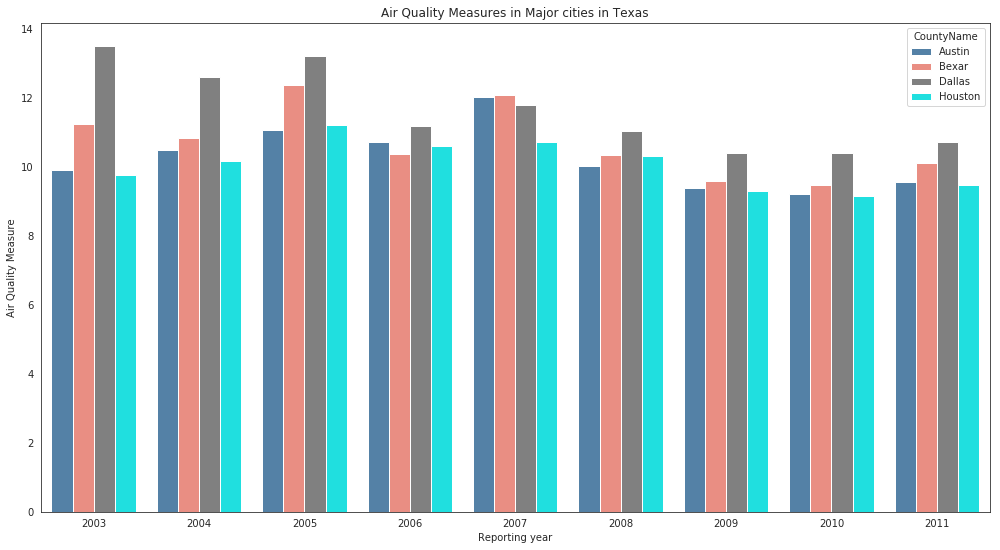

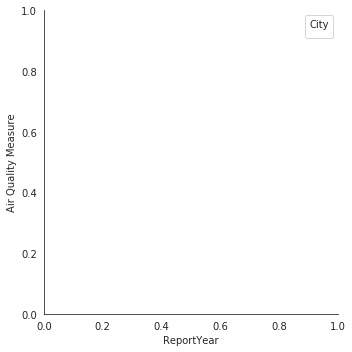

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")

fig, ax = plt.subplots(figsize=(17,9))
g = sns.catplot(x="ReportYear", y="Air Quality Measure", hue="CountyName", data=sfo_air_traffic_big4_agg,
                kind="bar", palette=sns.color_palette(palette = ["SteelBlue" , "Salmon", "Grey", "Cyan"]), legend=False, ax=ax)

ax.set_title('Air Quality Measures in Major cities in Texas')
ax.set_xlabel('Reporting year')

plt.legend(title='City', loc='upper right', labels=['Austin', 'San Antonio', 'Dallas', 'Houston'])
plt.show(g)

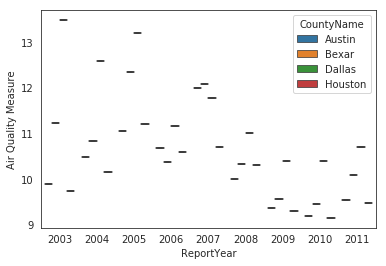

In [53]:
ax = sns.boxplot(x="ReportYear", y="Air Quality Measure", hue="CountyName", data=sfo_air_traffic_big4_agg)

In [0]:
def boxplot(x_data, y_data, base_color, median_color, x_label, y_label, title):
    _, ax = plt.subplots()

    # Draw boxplots, specifying desired style
    ax.boxplot(y_data
               # patch_artist must be True to control box fill
               , patch_artist = True
               # Properties of median line
               , medianprops = {'color': median_color}
               #, hue = {'hue': hue_col}
               # Properties of box
               , boxprops = {'color': base_color, 'facecolor': base_color}
               # Properties of whiskers
               , whiskerprops = {'color': base_color}
               # Properties of whisker caps
               , capprops = {'color': base_color})

    # By default, the tick label starts at 1 and increments by 1 for
    # each box drawn. This sets the labels to the ones we want
    ax.set_xticklabels(x_data)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

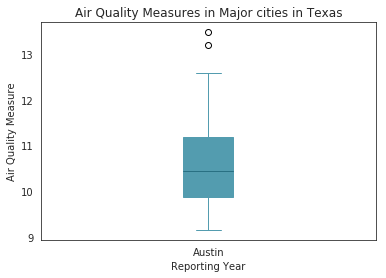

In [69]:
boxplot(x_data = sfo_air_traffic_big4_agg['CountyName']
        , y_data = sfo_air_traffic_big4_agg['Air Quality Measure']
        , base_color = '#539caf'
        , median_color = '#297083'
        #, hue_col = 'CountyName'
        , x_label = 'Reporting Year'
        , y_label = 'Air Quality Measure'
        , title = 'Air Quality Measures in Major cities in Texas')

In [0]:
sfo_air_traffic_big4_agg1=DataFrame({'Air Quality Measure' : TX_Air_Quality_big4.groupby(['CountyName'])['Value'].sum()}).reset_index()

In [77]:
sfo_air_traffic_big4_agg

,CountyName,ReportYear,Air Quality Measure
0,Austin,2003,9.904999
1,Austin,2004,10.485807
2,Austin,2005,11.062534
3,Austin,2006,10.695505
4,Austin,2007,12.010751
5,Austin,2008,10.002600
6,Austin,2009,9.373190
7,Austin,2010,9.196781
8,Austin,2011,9.549670
9,Bexar,2003,11.223995


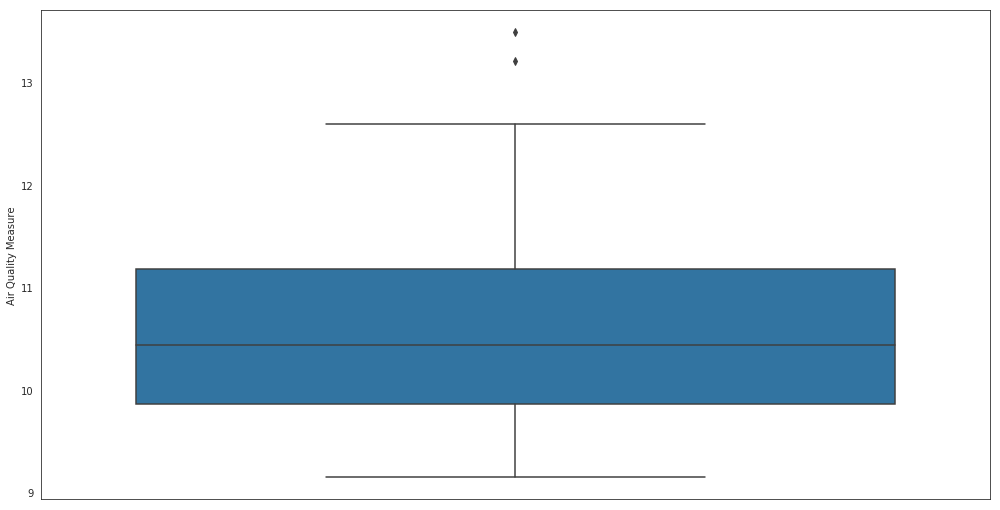

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")

fig, ax = plt.subplots(figsize=(17,9))
ax = sns.boxplot(y="Air Quality Measure", hue="CountyName", data=sfo_air_traffic_big4_agg)